## Gráficos de séries temporais do Banco Central do Brasil

Este notebook busca séries temporais da API do Banco Central do Brasil (SGS) e faz gráficos diversos.

Autor: Prof. Leopoldo Grajeda

Data da última atualização: 10/02/2025

In [1]:
# Carregamento das bibliotecas NumPy e Pandas
import numpy  as np
import pandas as pd

# Carregamento da API do Banco Central do Brasil
from bcb import sgs

# Carregamento do recurso plotly.graph_objects da biblioteca Plotly
import matplotlib.pyplot as plt

In [2]:
# Dicionário de séries temporais mensais de indicadores macroeconômicos
SeriesMensaisMacro = {
    # Atividade econômica
    'PIB mensal':4385,       # PIB em dólares US$ (milhões)
    'IBC-BR':24363,       # Índice de Atividade Econômica, do BCB
    
    # Taxas de juros
    'SELIC':4390,         # Taxa SELIC
    'CDI':4391,           # Taxa CDI
    
    # Índices de inflação
    'IPCA':433            # Índice Nacional de Preços ao Consumidor - Amplo, do IBGE
}

In [3]:
BCBdadosMacro = sgs.get(SeriesMensaisMacro)

In [4]:
BCBdadosMacro.tail()

,PIB mensal,IBC-BR,SELIC,CDI,IPCA
Date,,,,,
2024-10-01,184818.0,155.92,0.93,0.93,0.56
2024-11-01,179417.0,150.72,0.79,0.79,0.39
2024-12-01,173954.0,NaN,0.93,0.93,0.52
2025-01-01,NaN,NaN,1.01,1.01,NaN
2025-02-01,NaN,NaN,0.25,0.25,NaN


<Axes: xlabel='Date'>

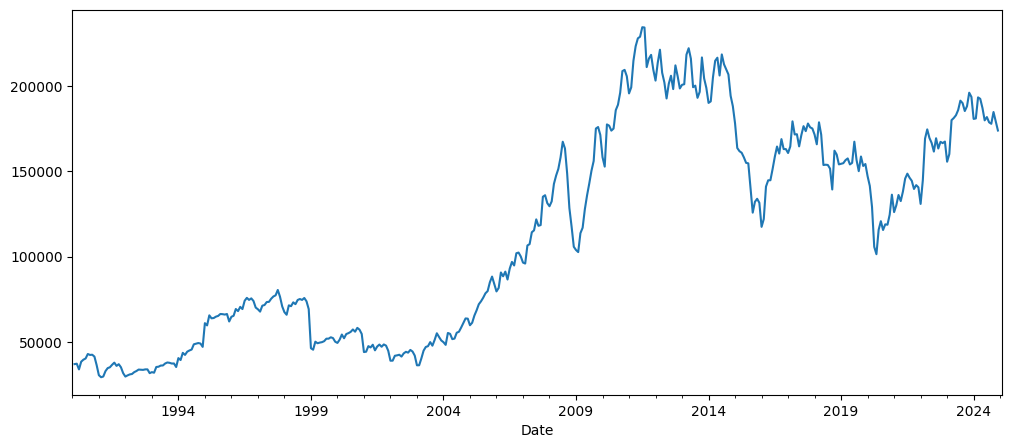

In [5]:
BCBdadosMacro['PIB mensal'][BCBdadosMacro.index >= '1990-01-01'].plot(figsize = (12,5))

In [6]:
SerieMensalDF = pd.DataFrame()
SerieMensalDF.index = BCBdadosMacro['PIB mensal'].index
SerieMensalDF.index.rename('Data', inplace = True)
SerieMensalDF['PIB'] = BCBdadosMacro['PIB mensal']
SerieMensalDF.dropna(inplace = True)
SerieMensalDF.to_csv('PIBmensal.csv')

<Axes: xlabel='Data'>

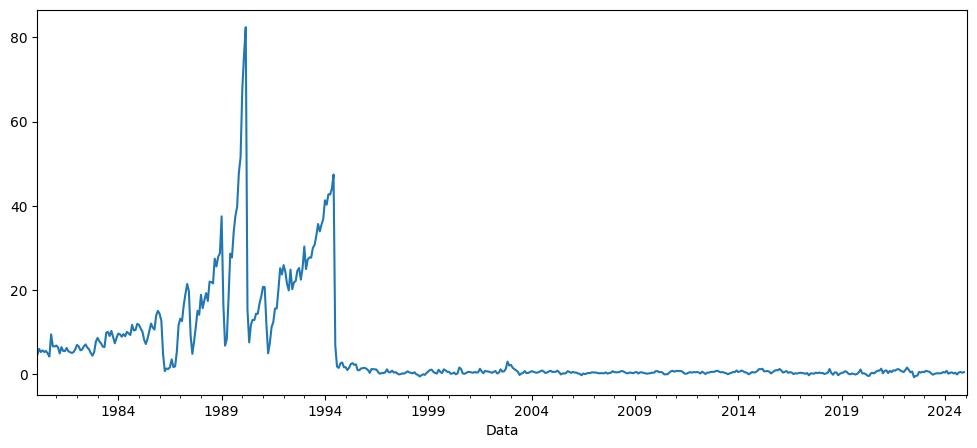

In [7]:
BCBdadosMacro['IPCA'].plot(figsize = (12,5))

<Axes: xlabel='Data'>

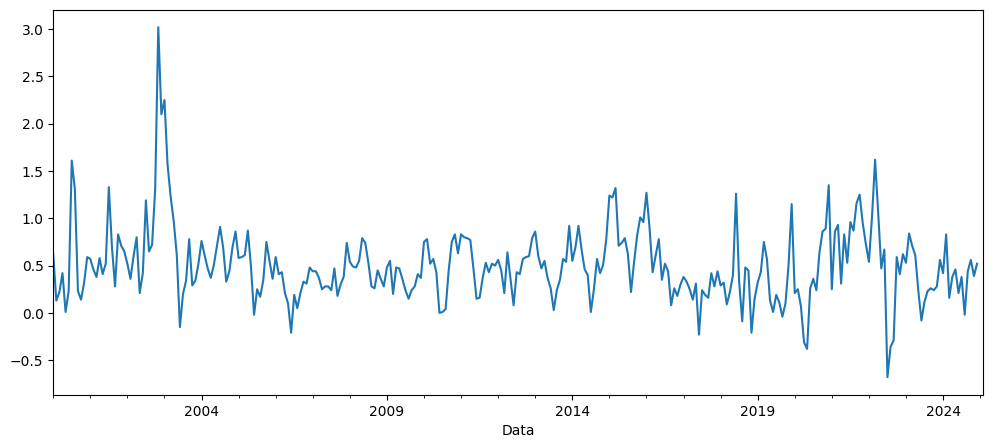

In [8]:
BCBdadosMacro['IPCA'][BCBdadosMacro.index >= '2000-01-01'].plot(figsize = (12,5))

In [9]:
SerieMensalDF = pd.DataFrame()
SerieMensalDF.index = BCBdadosMacro['IPCA'].index
SerieMensalDF.index.rename('Data', inplace = True)
SerieMensalDF['IPCA'] = BCBdadosMacro['IPCA']
SerieMensalDF.dropna(inplace = True)
SerieMensalDF.to_csv('IPCA.csv')

<Axes: xlabel='Data'>

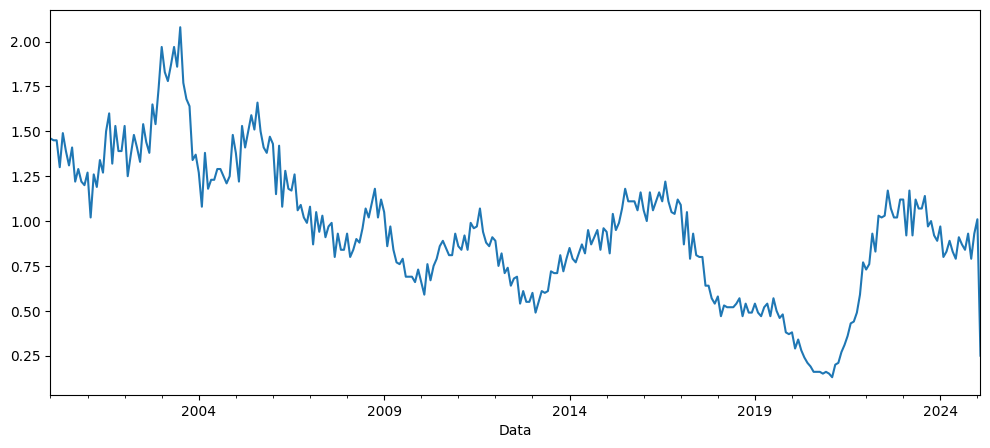

In [10]:
BCBdadosMacro['SELIC'][BCBdadosMacro.index >= '2000-01-01'].plot(figsize = (12,5))

In [11]:
SerieMensalDF = pd.DataFrame()
SerieMensalDF.index = BCBdadosMacro['SELIC'].index
SerieMensalDF.index.rename('Data', inplace = True)
SerieMensalDF['SELIC'] = BCBdadosMacro['SELIC']
SerieMensalDF.dropna(inplace = True)
SerieMensalDF.to_csv('SELIC.csv')

<Axes: xlabel='Data'>

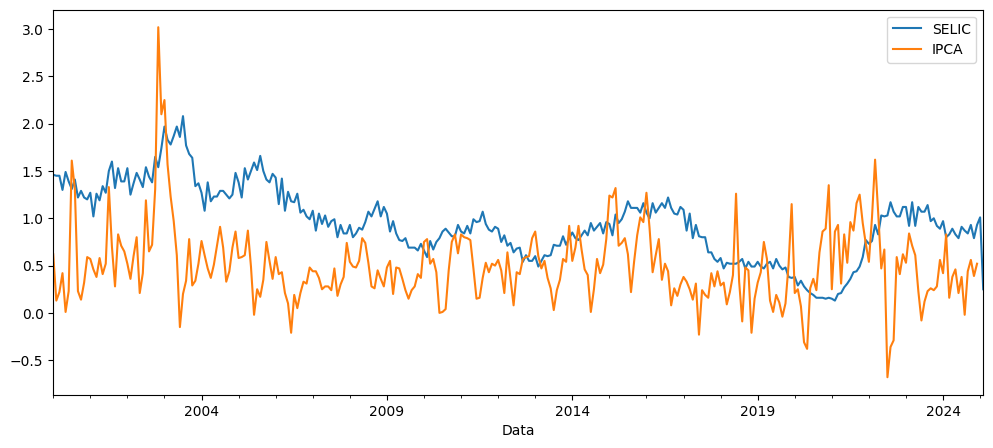

In [12]:
BCBdadosMacro[['SELIC','IPCA']][BCBdadosMacro.index >= '2000-01-01'].plot(figsize = (12,5))